# Project 4 - Part 4: Factors that distinguish job category

## [4.1 Importing packages](#4.1)

## [4.2 Re-load and inspect data](#4.2)

## [4.3 Can we distinguish data scientist, data analyst and data engineer jobs?](#4.3)
###       [4.3.1 Generate category labels](#4.3.1)
###       [4.3.2 Define target and predictor variables](#4.3.2)
###       [4.3.3 Test classification algorithms](#4.3.3)
###       [4.3.4 What features are important?](#4.3.4)

## [4.4 Do these categories form distinct clusters?](#4.4)
###       [4.4.1 K-means clustering](#4.4.1)
###       [4.4.2 DBSCAN](#4.4.2)
###       [4.4.3 Cluster visualisation](#4.4.3)

## <a id= '4.1'>4.1 Importing packages </a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import make_pipeline, Pipeline

## <a id='4.2'>4.2 Re-load and inspect data</a>

In [2]:
file = 'jobs_full.csv'
jobs = pd.read_csv(file, index_col=0)

In [3]:
jobs.head()

,title,company,salary_low,salary_high,salary_mean,title_analyst,title_data,title_scientist,title_business,title_senior,...,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka,salary_class
index,,,,,,,,,,,,,,,,,,,,,
0,Data Engineer,Telstra,NaN,NaN,93703.231744,0.000000,0.489781,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
1,Junior Data Analyst/Scientist,International Institute of Data & Analytics,NaN,NaN,96583.608818,0.268433,0.339808,0.475133,0.0,0.0,...,0,0,0,1,1,1,0,0,0,0
2,Data Scientist,Nearmap - AU,NaN,NaN,94339.846850,0.000000,0.581723,0.813387,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,Data Scientist,nbn™,NaN,NaN,95988.998849,0.000000,0.581723,0.813387,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,Data Scientist,ResMed,NaN,NaN,95722.169606,0.000000,0.581723,0.813387,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [4]:
#I don't need the salary_low or salary_high columns, and I don't necessarily trust the imputed values for the 'salary_class'
#column, so I will drop these columns.
dropcols = ['salary_low','salary_high','salary_class']
jobs.drop(dropcols, axis=1, inplace=True)

In [5]:
jobs.describe()

,salary_mean,title_analyst,title_data,title_scientist,title_business,title_senior,title_research,title_engineer,title_lead,title_junior,...,skill_python,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.0,745.000000,745.000000,745.000000,745.000000,745.000000
mean,96261.634391,0.146133,0.142899,0.089737,0.052525,0.044792,0.034083,0.033112,0.019361,0.018777,...,0.273826,0.080537,0.064430,0.096644,1.0,0.473826,0.193289,0.034899,0.053691,0.014765
std,18751.776261,0.170123,0.223323,0.223825,0.170324,0.148749,0.129144,0.123173,0.101611,0.112137,...,0.446220,0.272305,0.245681,0.295671,0.0,0.499650,0.395143,0.183648,0.225559,0.120692
min,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93879.246958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94624.780456,0.133345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,95316.251128,0.224538,0.257444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,250000.000000,1.000000,0.784700,1.000000,0.901558,0.902902,0.914038,0.871845,0.858930,0.870515,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


## <a id='4.3'>4.3 Can we distinguish data scientist vs data analyst vs data engineer jobs?</a>

What are the defining features that distinguish data scientist, data analyst and data engineer roles? Do people recruiting for these jobs look for the same skills in their candidates? Do different key words in the job title or summary predict whether the ad is for one of these roles vs. the others?

I will examine these questions by using classification modelling to try and predict the job category (data scientist, data analsyst or data engineer) from the salary information, job title, location, summary keywords and desired skills. From this model I will then extract the features that have the biggest impact on what category the job belongs to in order to determine what features distinguish these different data jobs

### <a id='4.3.1'>4.3.1 Generate category labels</a>

In [6]:
#Define a function to assign a label based on whether the job title contains the word scientist(2), analyst(1) or neither(0)
def category_finder(string):
    if 'scientist' in string.lower():
        val = 2
    elif 'analyst' in string.lower():
        val = 1
    elif 'engineer' in string.lower():
        val = 0
    else:
        val = np.nan
    return val

In [7]:
#Create a column for category labels
jobs['job_category'] = jobs['title'].apply(category_finder)

In [8]:
#Drop the jobs that fit into none of the above categories.
jobs_sub = jobs.dropna()

### <a id='4.3.2'>4.3.2 Define target and predictor variables</a>

In [9]:
#Target variable is the job category
y = jobs_sub['job_category']
y.shape

(598,)

In [10]:
#Predictors are the mean_salary, plus the title, state and keyword columns
X = jobs_sub.iloc[:,2:-1]
X.shape

(598, 5051)

In [11]:
#In order to extract meaningful features about the job, I'll remove the obvious things, like having 'analyst' or 'scientist' in
#the job title or description
dropcols = ['title_analyst', 'title_scientist','kw_scientist','kw_analyst','kw_scientists','kw_engin','title_engineer','kw_scienc','kw_engineers','kw_science']
X.drop(dropcols, axis=1, inplace=True)

In [12]:
#Set up train-test split, stratify on category labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11, stratify=jobs_sub['job_category'])

In [13]:
y_test.value_counts()

1.0    138
2.0     42
0.0     18
Name: job_category, dtype: int64

In [14]:
baseline = 138 / len(y_test)
baseline

0.696969696969697

### <a id='4.3.3'>4.3.3 Test different classification algorithms</a>

In [15]:
knn_params = {'n_neighbors':[1,3,5,9,15,18,21,25],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5)
knn_gs.fit(X_train, y_train)
knn = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [16]:
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)

In [17]:
#Despite performing well on my last problem, gridsearching for SVM in this case was taking an excessively long time.

gammas = np.logspace(-5, 2, 20)
Cs = np.logspace(-3, 2, 10)
kernels = ['rbf', 'linear']
params = dict(gamma=gammas, C=Cs, kernel=kernels)
svm_gs = GridSearchCV(SVC(), params, cv=5, scoring='accuracy')
svm_gs.fit(X_train, y_train)
svm = svm_gs.best_estimator_
print(svm_gs.best_params_)

svm_pred = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)

In [18]:
params = {'max_depth':[3,4,5],
         'max_leaf_nodes':[2,3,4],
         'min_samples_split':[2,3,4,5,10,15,25],
         'max_features':[5,10,50,100,500]}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_gs.fit(X_train, y_train)
dtc = dtc_gs.best_estimator_
print(dtc_gs.best_params_)

{'max_depth': 5, 'max_features': 500, 'max_leaf_nodes': 4, 'min_samples_split': 5}


In [19]:
dtc_pred = dtc.predict(X_test)
dtc_score = dtc.score(X_test, y_test)

In [20]:
bag = BaggingClassifier(dtc, max_samples=1.0,random_state=5)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_score = bag.score(X_test, y_test)

In [21]:
rf_params = {'n_estimators': [5,10,15,30,50],
            'max_features':[5,20,50,100,250,500],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,20,25]}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(X_train, y_train)
rf = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'max_features': 500, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 15}


In [22]:
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)

In [23]:
#WARNING: Slow!
logreg_params = {'penalty':['l2'],
                'C':np.logspace(-3,2,10),
                'solver':['newton-cg','sag']}

logreg_gs = GridSearchCV(LogisticRegression(), logreg_params, cv=5)
logreg_gs.fit(X_train, y_train)
logreg = logreg_gs.best_estimator_
print(logreg_gs.best_params_)

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line se

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:422: LineSearchWarning: Rounding er

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The l

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search alg

{'C': 27.825594022071257, 'penalty': 'l2', 'solver': 'newton-cg'}


In [24]:
logreg_pred = logreg.predict(X_test)
logreg_score = logreg.score(X_test, y_test)

In [25]:
models = ['KNN','DecisionTree','Bagging','RandomForest','LogisticRegression','Baseline']
accuracy = [knn_score, dtc_score, bag_score,rf_score,logreg_score, baseline]
class_summary = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
class_summary = class_summary.set_index('Model')

In [26]:
class_summary

,Accuracy
Model,
KNN,0.676768
DecisionTree,0.762626
Bagging,0.787879
RandomForest,0.858586
LogisticRegression,0.858586
Baseline,0.696970


Random forest classification returned the highest accuracy, with logistic regression a surprise tie. I will evaluate the random forest model more closely.

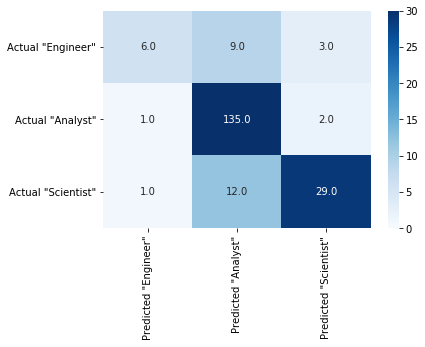

In [27]:
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted "Engineer"','Predicted "Analyst"','Predicted "Scientist"'], 
            yticklabels = ['Actual "Engineer"', 'Actual "Analyst"', 'Actual "Scientist"'])

The confusion matrix shows that a random forest model does quite well at correctly classifying jobs based on key words, location and skills. It does better at predicting analyst and scientist roles compared to engineer roles however.

#### <a id='4.3.4'>4.3.4 What features are most important for distinguishing between, data scientist, data analyst and data engineers?</a>

In [28]:
importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature':X.columns, 'importance':importance}).sort_values('importance', ascending= False)
importance_df.head(20)

,feature,importance
5031,skill_python,0.089095
146,kw_python,0.048318
476,kw_scientif,0.042995
5032,skill_spark,0.040206
241,kw_predict,0.034275
62,kw_learn,0.033424
23,title_environmental,0.031500
77,kw_machin,0.030461
1,title_data,0.023182
200,kw_field,0.018188


Some interesting features emerge as important in differentiating classes of jobs. The presence of the keyword 'Machine', as well as the keyword 'learn' (and to a lesser extent 'predict'), all associated with the concept of machine learning, suggests that this is one of the key areas of expertise for a data scientist.
'Environment' and 'Environmental' come up as important keywords, probably being related to 'scientist' more than other job types.
Interestingly, in terms of skills both Python and Spark appear to be the key skills that differentiate between data scientist roles, data analyst roles and data engineer roles.

## <a id='4.4'>4.4 Do these categories form distinct clusters?</a>

Do 'data scientist', 'data analyst' and other data-related jobs form distinct clusters based on the keywords we've extracted?

If they do, our labels for data scientist/analyst/etc should match up relatively closely with the clusters found using unsupervised clustering algorithms such as K-means or DB-SCAN if we use the predictors we found to be important above.

### <a id='4.4.1'>4.4.1 K-means clustering</a>

In [29]:
#Re-initialize predictors
X = jobs_sub[importance_df.feature.head(50)]
#Standardise
ss = StandardScaler()
X = ss.fit_transform(X)

First, I'll run k-means clustering models with different numbers of clusters to work out what number of clusters works best.

[0.2649986115219452, 0.2095061219446041, 0.18416582098100023, 0.09082530188657251, 0.06954931269533009, 0.0939573937691564, 0.09661986955744237, 0.1301147822152653, 0.14347329388013091, 0.08568784572648529, 0.10733056059669856, 0.09317194710079266, 0.09967106615839544, 0.08211267530054096, 0.08804971025526796, 0.09548220855828833]


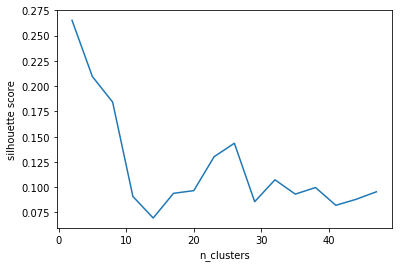

In [30]:
xvalues = []
scores = []
for i in range(2,50,3):
    km = KMeans(n_clusters = i, n_init = 20)
    model = km.fit(X)
    labels = model.labels_
    xvalues.append(i)
    scores.append(silhouette_score(X, model.labels_))
    
plt.plot(xvalues, scores)
plt.xlabel('n_clusters')
plt.ylabel('silhouette score')

print(scores)

It seems like fewer clusters are better.

In [31]:
#Run K-means clustering with different n_clusters
k2 = KMeans(n_clusters=2, n_init = 20)
k2model = k2.fit(X)
k3 = KMeans(n_clusters=3, n_init = 20)
k3model = k3.fit(X)
k5 = KMeans(n_clusters=5, n_init = 20)
k5model = k5.fit(X)

In [32]:
#Calculate labels, centroids and silhouette scores for each
k2_labels = k2model.labels_
k2_centroids = k2model.cluster_centers_
k2_score = silhouette_score(X, k2_labels)
k3_labels = k3model.labels_
k3_centroids = k3model.cluster_centers_
k3_score = silhouette_score(X, k3_labels)
k5_labels = k5model.labels_
k5_centroids = k5model.cluster_centers_
k5_score = silhouette_score(X, k5_labels)
#Print scores:
print('k2 score: ', k2_score)
print('k3_score: ', k3_score)
print('k5_score: ', k5_score)

k2 score:  0.26615320004162857
k3_score:  0.28570992434510895
k5_score:  0.1968334293058852


3 clusters seems the best, which is also what makes most sense logically as this is the number of job categories we assigned earlier.

In [33]:
homogeneity = homogeneity_score(y, k3_labels)
completeness = completeness_score(y, k3_labels)
vmeasure = v_measure_score(y, k3_labels)
print(homogeneity)
print(completeness)
print(vmeasure)

0.28247507087003654
0.36748854023219896
0.31942204047385825


The 3 cluster K-means model performs about the same when we look at homogeneity and completeness. Homogeneity is a measure of whether each cluster contains only members from one class, and completeness is whether members of one class are concentrated into only one cluster.

### <a id='4.4.2'>4.4.2 DBSCAN</a>

In [34]:
#With a bit of trial and error, the best silhouette score I could obtain was using eps = 13 and min_samples = 5
db = DBSCAN(eps = 13, min_samples = 5)
model = db.fit(X)
db_labels = db.labels_

db_score = silhouette_score(X, db_labels)

print(db_score)

0.5439131734926986


In [35]:
homogeneity = homogeneity_score(y, db_labels)
completeness = completeness_score(y, db_labels)
vmeasure = v_measure_score(y, db_labels)
print(homogeneity)
print(completeness)
print(vmeasure)

0.026158621651891367
0.24485923877764956
0.04726758727268366


While the silhouette score for DBSCAN is reasonably good, the homogeneity score is quite poor, suggesting that our clusters contain members of several classes. This in turn results in a lower v measure score, which is the harmonic mean between the homogeneity and completeness scores. Since the K-means model performed better I will visualise the clusters we found using the 3-cluster K-means model above.

### <a id='4.4.3'>4.4.3 Cluster visualisation</a>

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Predicted classification')

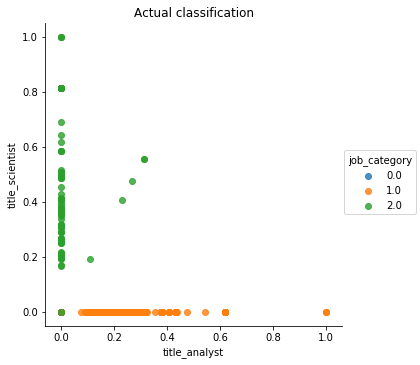

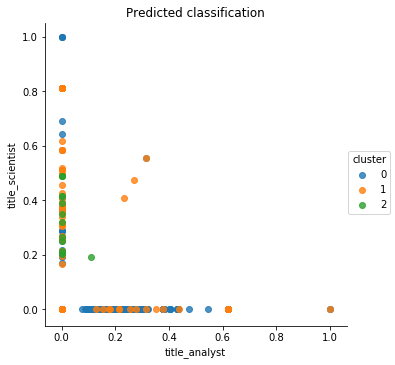

In [36]:
jobs_sub['cluster'] = k3_labels
sns.lmplot(x='title_analyst',y='title_scientist',data=jobs_sub,hue='job_category',fit_reg=False)
plt.title('Actual classification')

sns.lmplot(x='title_analyst',y='title_scientist',data=jobs_sub,hue='cluster',fit_reg=False)
plt.title('Predicted classification')

We have at least one group that clusters quite homogenously to the 'scientist' section of the plot, while the other two clusters are scattered across both groups.

Text(0.5,1,'Predicted classification')

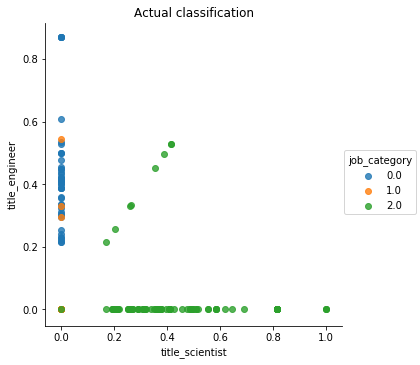

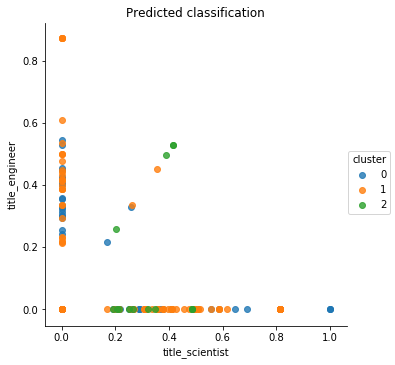

In [37]:
sns.lmplot(x='title_scientist',y='title_engineer',data=jobs_sub,hue='job_category',fit_reg=False)
plt.title('Actual classification')

sns.lmplot(x='title_scientist',y='title_engineer',data=jobs_sub,hue='cluster',fit_reg=False)
plt.title('Predicted classification')

Again, the green cluster groups fairly homogenously with the 'scientist' roles, suggesting that this cluster probably consists of 'data scientist' jobs. We at least have one cluster that consists entirely of jobs with 'scientist' in the title, although this cluster does not include all such jobs.

Text(0.5,1,'Predicted classification')

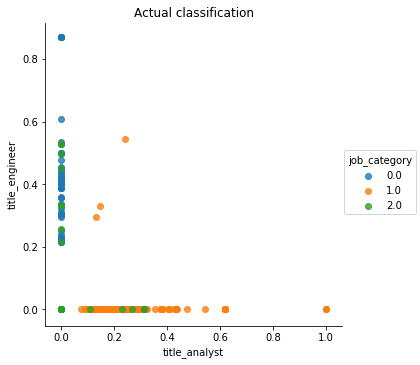

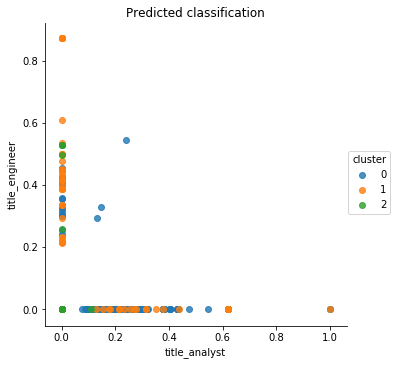

In [38]:
sns.lmplot(x='title_analyst',y='title_engineer',data=jobs_sub,hue='job_category',fit_reg=False)
plt.title('Actual classification')

sns.lmplot(x='title_analyst',y='title_engineer',data=jobs_sub,hue='cluster',fit_reg=False)
plt.title('Predicted classification')

Reflecting what we observed above, the clusters are not homogenous when it comes to data analyst vs data engineer jobs. Even with our actual labels though, we can see that there is less clear seaparation between these categories.